In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('output.csv')
df

C:\Users\darre\AppData\Local\Temp\ipykernel_17152\3808885772.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('output.csv')


,Negara,Tahun,Jumlah,Satuan,NamaSumber,Indikator,Kode HS,Label
0,Panama,2003,0.0,US$,Trademap,Ekspor Indonesia ke Negara Mitra,26,"Ores, slag and ash"
1,Panama,2003,14632.0,US$,Trademap,Ekspor Indonesia ke Negara Mitra,30,Pharmaceutical products
2,Panama,2003,2.0,US$,Trademap,Ekspor Indonesia ke Negara Mitra,85,Electrical machinery and equipment and parts t...
3,Panama,2003,818.0,US$,Trademap,Ekspor Indonesia ke Negara Mitra,84,"Nuclear reactors, boilers, machinery and mecha..."
4,Panama,2003,11.0,US$,Trademap,Ekspor Indonesia ke Negara Mitra,29,Organic chemicals
...,...,...,...,...,...,...,...,...
100783,Burkina Faso,2018,45.0,US$,Trademap,Impor Indonesia dari Negara Mitra,47,Pulp of wood or of other fibrous cellulosic ma...
100784,Burkina Faso,2018,32.0,US$,Trademap,Impor Indonesia dari Negara Mitra,81,Other base metals; cermets; articles thereof
100785,Burkina Faso,2018,6.0,US$,Trademap,Impor Indonesia dari Negara Mitra,75,Nickel and articles thereof
100786,Burkina Faso,2018,4.0,US$,Trademap,Impor Indonesia dari Negara Mitra,6,"Live trees and other plants; bulbs, roots and ..."


In [3]:
HS_ref_table = df[['Kode HS', 'Label']]
HS_ref_table

,Kode HS,Label
0,26,"Ores, slag and ash"
1,30,Pharmaceutical products
2,85,Electrical machinery and equipment and parts t...
3,84,"Nuclear reactors, boilers, machinery and mecha..."
4,29,Organic chemicals
...,...,...
100783,47,Pulp of wood or of other fibrous cellulosic ma...
100784,81,Other base metals; cermets; articles thereof
100785,75,Nickel and articles thereof
100786,6,"Live trees and other plants; bulbs, roots and ..."


In [4]:
hs_check = df.groupby('Kode HS')['Label'].nunique()
hs_check

Kode HS
1       1
2       1
3       1
4       1
5       1
       ..
96      1
97      1
99      1
To      1
Tota    1
Name: Label, Length: 205, dtype: int64

In [5]:
print(hs_check.unique())

[1 2]


In [6]:
hs_dupe_codes = hs_check[hs_check >1].index
HS_ref_nodupe = HS_ref_table.drop_duplicates()
hs_dupe_list = HS_ref_nodupe[HS_ref_nodupe['Kode HS'].isin(hs_dupe_codes)]

hs_dupe_list = hs_dupe_list.sort_values(by='Kode HS').reset_index(drop=True)
hs_dupe_list

,Kode HS,Label
0,04,Dairy produce; birds' eggs; natural honey; edi...
1,04,Dairy produce; birds' eggs; natural honey; edi...
2,12,Oil seeds and oleaginous fruits; miscellaneous...
3,12,Oil seeds and oleaginous fruits; miscellaneous...
4,15,"Animal, vegetable or microbial fats and oils a..."
5,15,"Animal, vegetable or microbial fats and oils a..."
6,16,"Preparations of meat, of fish, of crustaceans,..."
7,16,"Preparations of meat, of fish, of crustaceans,..."
8,24,Tobacco and manufactured tobacco substitutes; ...
9,24,Tobacco and manufactured tobacco substitutes; ...


In [7]:
print(f"\"{hs_dupe_list['Label'][0]}\"")
print(f"\"{hs_dupe_list['Label'][1]}\"")

"Dairy produce; birds' eggs; natural honey; edible products of animal origin, not elsewhere ..."
"Dairy produce; birds' eggs; natural honey; edible products of animal origin, not elsewhere . . ."


In [8]:
# First entry  is U+0020 space then '...'
# Second entry is U+00A0 space (nbsp) then '. . .'

In [9]:
# regex replace '. . .' with '...' in df label
df['Label'] = df['Label'].str.replace(r'\u00A0\.\s\.\s\.', ' ...', regex=True)

In [10]:
print(df.groupby('Kode HS')['Label'].nunique().unique())
# [1] -> fixed label

[1]


In [11]:
df['Kode HS'].unique()

array(['26', '30', '85', '84', '29', '64', '62', '33', '61', '22', '87',
       '71', '39', '40', '95', '08', '42', '90', '03', '63', '54', '94',
       '73', '24', '91', '48', '15', '44', '76', '82', '72', '23', '96',
       '38', '83', '17', '34', '02', '65', '32', '70', '09', '74', '69',
       '21', '25', '92', '49', '57', '04', '27', '67', '16', '37', '18',
       '20', '19', '66', '68', '12', '56', '89', '35', '28', '31', '78',
       '05', '41', '07', '58', '59', '47', '52', '55', '99', '81', '11',
       '36', '86', '79', '13', '97', '88', '46', '45', '01', '10', '06',
       '53', '75', '51', '93', '43', '60', '50', '80', '14', 'To', '4',
       '2', '8', '7', '3', '9', '6', '1', '5', 'Tota', 7, 44, 40, 22, 15,
       69, 34, 20, 24, 32, 70, 29, 64, 68, 81, 83, 17, 42, 16, 96, 18, 3,
       9, 95, 63, 99, 23, 82, 57, 1, 88, 49, 52, 11, 47, 12, 35, 6, 56,
       89, 59, 13, 55, 86, 54, 65, 79, 31, 58, 97, 75, 67, 36, 37, 60, 46,
       92, 50, 80, 66, 53, 45, 14, 93, 51, 41, 78

In [12]:
df[df['Kode HS'] == 'Tota'].head()

,Negara,Tahun,Jumlah,Satuan,NamaSumber,Indikator,Kode HS,Label
35351,Panama,2004,3590297.0,US$,Trademap,Impor Indonesia dari Negara Mitra,Tota,All products
35449,Panama,2005,4152486.0,US$,Trademap,Impor Indonesia dari Negara Mitra,Tota,All products
35547,Panama,2006,10774926.0,US$,Trademap,Impor Indonesia dari Negara Mitra,Tota,All products
35645,Panama,2007,13268935.0,US$,Trademap,Impor Indonesia dari Negara Mitra,Tota,All products
35743,Panama,2008,15736509.0,US$,Trademap,Impor Indonesia dari Negara Mitra,Tota,All products


In [13]:
df[df['Kode HS'] == 'To'].head()

,Negara,Tahun,Jumlah,Satuan,NamaSumber,Indikator,Kode HS,Label
97,Panama,2004,891105.0,US$,Trademap,Ekspor Indonesia ke Negara Mitra,To,All products
195,Panama,2005,963216.0,US$,Trademap,Ekspor Indonesia ke Negara Mitra,To,All products
293,Panama,2006,8033926.0,US$,Trademap,Ekspor Indonesia ke Negara Mitra,To,All products
391,Panama,2007,8820595.0,US$,Trademap,Ekspor Indonesia ke Negara Mitra,To,All products
489,Panama,2008,9816620.0,US$,Trademap,Ekspor Indonesia ke Negara Mitra,To,All products


In [14]:
# Replace 'Tota' with 'To' in 'Kode HS' to placeholder 999
df['Kode HS'] = df['Kode HS'].replace({'Tota': 999})
df['Kode HS'] = df['Kode HS'].replace({'To': 999})

In [15]:
# Ensure 'Kode HS' column is of string type to avoid type comparison issues
df['Kode HS'] = df['Kode HS'].astype(int)

fixed_HS_ref_table = df[['Kode HS', 'Label']].drop_duplicates().sort_values(by='Kode HS').reset_index(drop=True)
fixed_HS_ref_table
# Missing HS code > 77 & 98

,Kode HS,Label
0,1,Live animals
1,2,Meat and edible meat offal
2,3,"Fish and crustaceans, molluscs and other aquat..."
3,4,Dairy produce; birds' eggs; natural honey; edi...
4,5,"Products of animal origin, not elsewhere speci..."
...,...,...
93,95,"Toys, games and sports requisites; parts and a..."
94,96,Miscellaneous manufactured articles
95,97,"Works of art, collectors' pieces and antiques"
96,99,Commodities not elsewhere specified


# Cleaning

In [16]:
# Total missing per column
print(df.isnull().sum())

Negara           0
Tahun            0
Jumlah        6725
Satuan           0
NamaSumber       0
Indikator        0
Kode HS          0
Label            0
dtype: int64


In [17]:
# Check jumlah
print("Total count:", len(df[df['Jumlah'] == 0]))

Total count: 5773


In [18]:
df[df['Jumlah'] == 0]

,Negara,Tahun,Jumlah,Satuan,NamaSumber,Indikator,Kode HS,Label
0,Panama,2003,0.0,US$,Trademap,Ekspor Indonesia ke Negara Mitra,26,"Ores, slag and ash"
17,Panama,2003,0.0,US$,Trademap,Ekspor Indonesia ke Negara Mitra,90,"Optical, photographic, cinematographic, measur..."
24,Panama,2003,0.0,US$,Trademap,Ekspor Indonesia ke Negara Mitra,91,Clocks and watches and parts thereof
29,Panama,2003,0.0,US$,Trademap,Ekspor Indonesia ke Negara Mitra,82,"Tools, implements, cutlery, spoons and forks, ..."
46,Panama,2003,0.0,US$,Trademap,Ekspor Indonesia ke Negara Mitra,92,Musical instruments; parts and accessories of ...
...,...,...,...,...,...,...,...,...
100498,Burkina Faso,2015,0.0,US$,Trademap,Impor Indonesia dari Negara Mitra,6,"Live trees and other plants; bulbs, roots and ..."
100502,Burkina Faso,2015,0.0,US$,Trademap,Impor Indonesia dari Negara Mitra,41,Raw hides and skins (other than furskins) and ...
100593,Burkina Faso,2016,0.0,US$,Trademap,Impor Indonesia dari Negara Mitra,75,Nickel and articles thereof
100599,Burkina Faso,2016,0.0,US$,Trademap,Impor Indonesia dari Negara Mitra,80,Tin and articles thereof


In [19]:
# Check null jumlah
df[df['Jumlah'].isnull()]

,Negara,Tahun,Jumlah,Satuan,NamaSumber,Indikator,Kode HS,Label
2057,Nigeria,2004,NaN,US$,Trademap,Ekspor Indonesia ke Negara Mitra,999,All products
2058,Nigeria,2004,NaN,US$,Trademap,Ekspor Indonesia ke Negara Mitra,27,"Mineral fuels, mineral oils and products of th..."
2059,Nigeria,2004,NaN,US$,Trademap,Ekspor Indonesia ke Negara Mitra,31,Fertilisers
2060,Nigeria,2004,NaN,US$,Trademap,Ekspor Indonesia ke Negara Mitra,89,"Ships, boats and floating structures"
2061,Nigeria,2004,NaN,US$,Trademap,Ekspor Indonesia ke Negara Mitra,18,Cocoa and cocoa preparations
...,...,...,...,...,...,...,...,...
95371,British Virgin Islands,2023,NaN,US$,Trademap,Impor Indonesia dari Negara Mitra,93,Arms and ammunition; parts and accessories the...
95372,British Virgin Islands,2023,NaN,US$,Trademap,Impor Indonesia dari Negara Mitra,43,Furskins and artificial fur; manufactures thereof
95373,British Virgin Islands,2023,NaN,US$,Trademap,Impor Indonesia dari Negara Mitra,53,Other vegetable textile fibres; paper yarn and...
95374,British Virgin Islands,2023,NaN,US$,Trademap,Impor Indonesia dari Negara Mitra,50,Silk


In [20]:
# remove Jumlah missing and null
filtered_df = df[df['Jumlah'] > 0]
filtered_df = filtered_df.dropna(subset=['Jumlah'])

filtered_df


,Negara,Tahun,Jumlah,Satuan,NamaSumber,Indikator,Kode HS,Label
1,Panama,2003,14632.0,US$,Trademap,Ekspor Indonesia ke Negara Mitra,30,Pharmaceutical products
2,Panama,2003,2.0,US$,Trademap,Ekspor Indonesia ke Negara Mitra,85,Electrical machinery and equipment and parts t...
3,Panama,2003,818.0,US$,Trademap,Ekspor Indonesia ke Negara Mitra,84,"Nuclear reactors, boilers, machinery and mecha..."
4,Panama,2003,11.0,US$,Trademap,Ekspor Indonesia ke Negara Mitra,29,Organic chemicals
5,Panama,2003,5.0,US$,Trademap,Ekspor Indonesia ke Negara Mitra,64,"Footwear, gaiters and the like; parts of such ..."
...,...,...,...,...,...,...,...,...
100783,Burkina Faso,2018,45.0,US$,Trademap,Impor Indonesia dari Negara Mitra,47,Pulp of wood or of other fibrous cellulosic ma...
100784,Burkina Faso,2018,32.0,US$,Trademap,Impor Indonesia dari Negara Mitra,81,Other base metals; cermets; articles thereof
100785,Burkina Faso,2018,6.0,US$,Trademap,Impor Indonesia dari Negara Mitra,75,Nickel and articles thereof
100786,Burkina Faso,2018,4.0,US$,Trademap,Impor Indonesia dari Negara Mitra,6,"Live trees and other plants; bulbs, roots and ..."


In [21]:
print(100788 - 6725 - 5773)

88290


In [22]:
# Check unique vals per column

for col in filtered_df.columns:
    print(f"Unique values in {col}: {filtered_df[col].nunique()}")

Unique values in Negara: 38
Unique values in Tahun: 21
Unique values in Jumlah: 48213
Unique values in Satuan: 1
Unique values in NamaSumber: 1
Unique values in Indikator: 2
Unique values in Kode HS: 98
Unique values in Label: 98


In [23]:
# List all unique vals in Negara
print("Unique values in Negara:", filtered_df['Negara'].unique(), end='\n\n')

print("Unique values in Tahun:", filtered_df['Tahun'].unique(), end='\n\n')

Unique values in Negara: ['Panama' 'Nigeria' 'Afghanistan' 'Albania' 'Algeria' 'American Samoa'
 'Andorra' 'Angola' 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Aruba' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain'
 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda'
 'Bhutan' 'Bolivia  Plurinational State of'
 'Bonaire  Sint Eustatius and Saba' 'Bosnia and Herzegovina' 'Botswana'
 'Bouvet Island' 'Brazil' 'British Antarctic Territory'
 'British Indian Ocean Territory' 'British Virgin Islands'
 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso']

Unique values in Tahun: [2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
 2017 2018 2019 2020 2021 2022 2023]



In [24]:
print("Unique values in Satuan:", filtered_df['Satuan'].unique(), end='\n\n')

print("Unique values in NamaSumber:", filtered_df['NamaSumber'].unique(), end='\n\n')

print("Unique values in Indikator:", filtered_df['Indikator'].unique(), end='\n\n')

Unique values in Satuan: ['US$']

Unique values in NamaSumber: ['Trademap']

Unique values in Indikator: ['Ekspor Indonesia ke Negara Mitra' 'Impor Indonesia dari Negara Mitra']



In [25]:
print("Unique values in Kode HS:", filtered_df['Kode HS'].unique(), end='\n\n')

print("Unique values in Label:", filtered_df['Label'].unique(), end='\n\n')

Unique values in Kode HS: [ 30  85  84  29  64  62  33  61  22  87  71  39  40  95   8  42   3  63
  54  94  73  24  48  15  44  76  72  23  96  38  83  17  34   2  65  32
  70   9  74  69  21  25  49   4  27  16  37  18  20  19  68  12  35  28
  78   5  41   7  47  11  36  13  97  46   1   6  53 999  89  86  10  14
  90  31  58  26  91  82  92  57  67  66  56  59  52  55  81  79  88  45
  75  51  93  43  60  50  80  99]

Unique values in Label: ['Pharmaceutical products'
 'Electrical machinery and equipment and parts thereof; sound recorders and reproducers, television ...'
 'Nuclear reactors, boilers, machinery and mechanical appliances; parts thereof'
 'Organic chemicals'
 'Footwear, gaiters and the like; parts of such articles'
 'Articles of apparel and clothing accessories, not knitted or crocheted'
 'Essential oils and resinoids; perfumery, cosmetic or toilet preparations'
 'Articles of apparel and clothing accessories, knitted or crocheted'
 'Beverages, spirits and vinegar'
 'Ve

In [26]:
final_df = filtered_df.copy()

# remove irrelevant columns
# final_df = final_df.drop(columns=['Satuan', 'NamaSumber', 'Kode HS', 'Label'])
final_df = final_df.drop(columns=['Satuan', 'NamaSumber','Label'])

# simplify Indikator
final_df['Indikator'] = final_df['Indikator'].str.split().str[0]

In [27]:
final_df

,Negara,Tahun,Jumlah,Indikator,Kode HS
1,Panama,2003,14632.0,Ekspor,30
2,Panama,2003,2.0,Ekspor,85
3,Panama,2003,818.0,Ekspor,84
4,Panama,2003,11.0,Ekspor,29
5,Panama,2003,5.0,Ekspor,64
...,...,...,...,...,...
100783,Burkina Faso,2018,45.0,Impor,47
100784,Burkina Faso,2018,32.0,Impor,81
100785,Burkina Faso,2018,6.0,Impor,75
100786,Burkina Faso,2018,4.0,Impor,6


In [28]:
# final_df['Jumlah'] = final_df['Jumlah'].astype(int)

# NO1 Visualisasi

In [29]:
#1 Jumlah  ekspor,  jumlah  impor,  dan  neraca  perdagangan  dan  volume  perdagangan Indonesia tahun terakhir
no1_df = final_df.groupby(['Tahun', 'Indikator']).agg({'Jumlah': 'sum'}).reset_index()

no1_df

,Tahun,Indikator,Jumlah
0,2003,Ekspor,9.073101e+07
1,2003,Impor,8.992527e+07
2,2004,Ekspor,2.881418e+08
3,2004,Impor,7.062367e+08
4,2005,Ekspor,3.389396e+08
5,2005,Impor,7.988338e+08
6,2006,Ekspor,5.266414e+08
7,2006,Impor,9.633541e+08
8,2007,Ekspor,6.174775e+08
9,2007,Impor,1.169206e+09


In [30]:
no1_df['Jumlah'] = no1_df['Jumlah'].astype(int)
print(no1_df.tail(2))

    Tahun Indikator      Jumlah
40   2023    Ekspor   661470328
41   2023     Impor  1439710962


In [31]:
# Jumlah ekspor, jumlah impor, dan neraca perdagangan Indonesia tahun terakhir
ekspor_n1 = no1_df.query("Indikator == 'Ekspor' and Tahun == 2023")['Jumlah'].values[0]
impor_n1 = no1_df.query("Indikator == 'Impor' and Tahun == 2023")['Jumlah'].values[0]

neraca_n1 = ekspor_n1 - impor_n1
volume_n1 = ekspor_n1 + impor_n1

print(f"Ekspor 2023: {ekspor_n1:,.0f} USD")
print(f"Impor  2023: {impor_n1:,.0f} USD")
print(f"Neraca 2023: {neraca_n1:,.0f} USD")
print(f"Volume 2023: {volume_n1:,.0f} USD")

Ekspor 2023: 661,470,328 USD
Impor  2023: 1,439,710,962 USD
Neraca 2023: -778,240,634 USD
Volume 2023: 2,101,181,290 USD


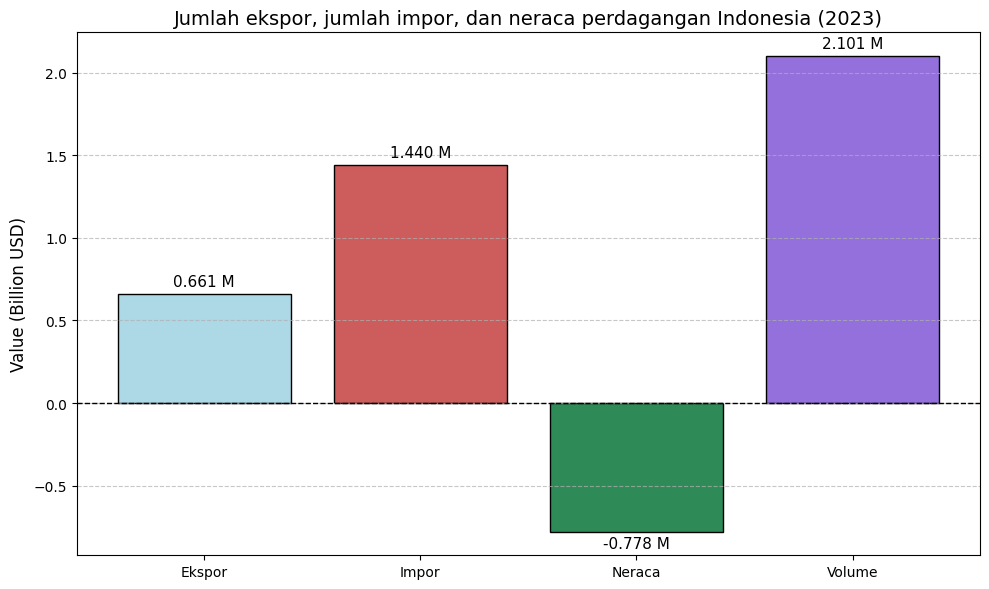

In [113]:
# Visualization Card
metrics = ['Ekspor', 'Impor', 'Neraca', 'Volume']
values = [ekspor_n1, impor_n1, neraca_n1, volume_n1]
values_in_billion = [v / 1e9 for v in values]

plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values_in_billion, color=['lightblue', 'indianred', 'seagreen', 'mediumpurple'], edgecolor='black')


for bar, value in zip(bars, values_in_billion):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.03 if bar.get_height()>0 else bar.get_height()  -0.03, 
             f"{value:.3f} M", ha='center', va='bottom' if value>0 else 'top', fontsize=11)

plt.title('Jumlah ekspor, jumlah impor, dan neraca perdagangan Indonesia (2023)', fontsize=14)
plt.ylabel('Value (Billion USD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()


In [32]:
#4 Top 10 negara ekspor dan impor Indonesia
no2_df = final_df.groupby(['Negara', 'Indikator']).agg({'Jumlah': 'sum'}).reset_index()
no2_df['Jumlah'] = no2_df['Jumlah'].astype(int)

no2_df_ekspor = no2_df[no2_df['Indikator'] == 'Ekspor'].sort_values(by='Jumlah', ascending=False).head(10).reset_index()
no2_df_impor = no2_df[no2_df['Indikator'] == 'Impor'].sort_values(by='Jumlah', ascending=False).head(10).reset_index()

In [33]:
no2_df_ekspor

,index,Negara,Indikator,Jumlah
0,21,Australia,Ekspor,4562058309
1,23,Austria,Ekspor,3215066352
2,52,Nigeria,Ekspor,2369959527
3,15,Argentina,Ekspor,1265922938
4,4,Algeria,Ekspor,978634288
5,10,Angola,Ekspor,696058005
6,31,Bangladesh,Ekspor,543121249
7,54,Panama,Ekspor,407940373
8,25,Azerbaijan,Ekspor,357214714
9,29,Bahrain,Ekspor,288718050


In [34]:
no2_df_impor

,index,Negara,Indikator,Jumlah
0,35,Belgium,Impor,8535129969
1,22,Australia,Impor,4126311449
2,45,Brazil,Impor,3560997772
3,24,Austria,Impor,3333724481
4,53,Nigeria,Impor,1407878455
5,16,Argentina,Impor,1113564550
6,5,Algeria,Impor,777286427
7,32,Bangladesh,Impor,732887715
8,55,Panama,Impor,700688525
9,50,Bulgaria,Impor,667242651


In [35]:
print("Top 10 Negara Impor Indonesia")
print(no2_df_impor[['Negara', 'Jumlah']].assign(Jumlah=no2_df_impor['Jumlah'].apply(lambda x: f"{x:,.0f}")))
print("")
print("Top 10 Negara Ekspor Indonesia")
print(no2_df_ekspor[['Negara', 'Jumlah']].assign(Jumlah=no2_df_ekspor['Jumlah'].apply(lambda x: f"{x:,.0f}")))

Top 10 Negara Impor Indonesia
       Negara         Jumlah
0     Belgium  8,535,129,969
1   Australia  4,126,311,449
2      Brazil  3,560,997,772
3     Austria  3,333,724,481
4     Nigeria  1,407,878,455
5   Argentina  1,113,564,550
6     Algeria    777,286,427
7  Bangladesh    732,887,715
8      Panama    700,688,525
9    Bulgaria    667,242,651

Top 10 Negara Ekspor Indonesia
       Negara         Jumlah
0   Australia  4,562,058,309
1     Austria  3,215,066,352
2     Nigeria  2,369,959,527
3   Argentina  1,265,922,938
4     Algeria    978,634,288
5      Angola    696,058,005
6  Bangladesh    543,121,249
7      Panama    407,940,373
8  Azerbaijan    357,214,714
9     Bahrain    288,718,050


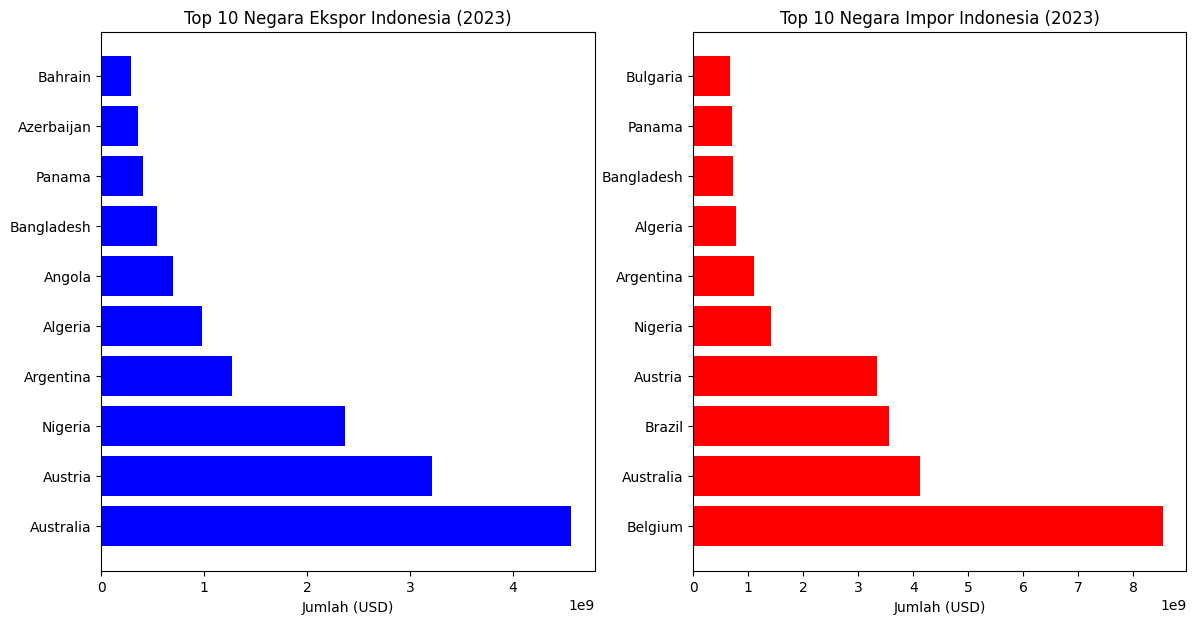

In [36]:
# Plotting
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.barh(no2_df_ekspor['Negara'], no2_df_ekspor['Jumlah'], color='blue')
plt.title('Top 10 Negara Ekspor Indonesia (2023)')
plt.xlabel('Jumlah (USD)')
plt.subplot(1, 2, 2)
plt.barh(no2_df_impor['Negara'], no2_df_impor['Jumlah'], color='red')
plt.title('Top 10 Negara Impor Indonesia (2023)')
plt.xlabel('Jumlah (USD)')
plt.show()


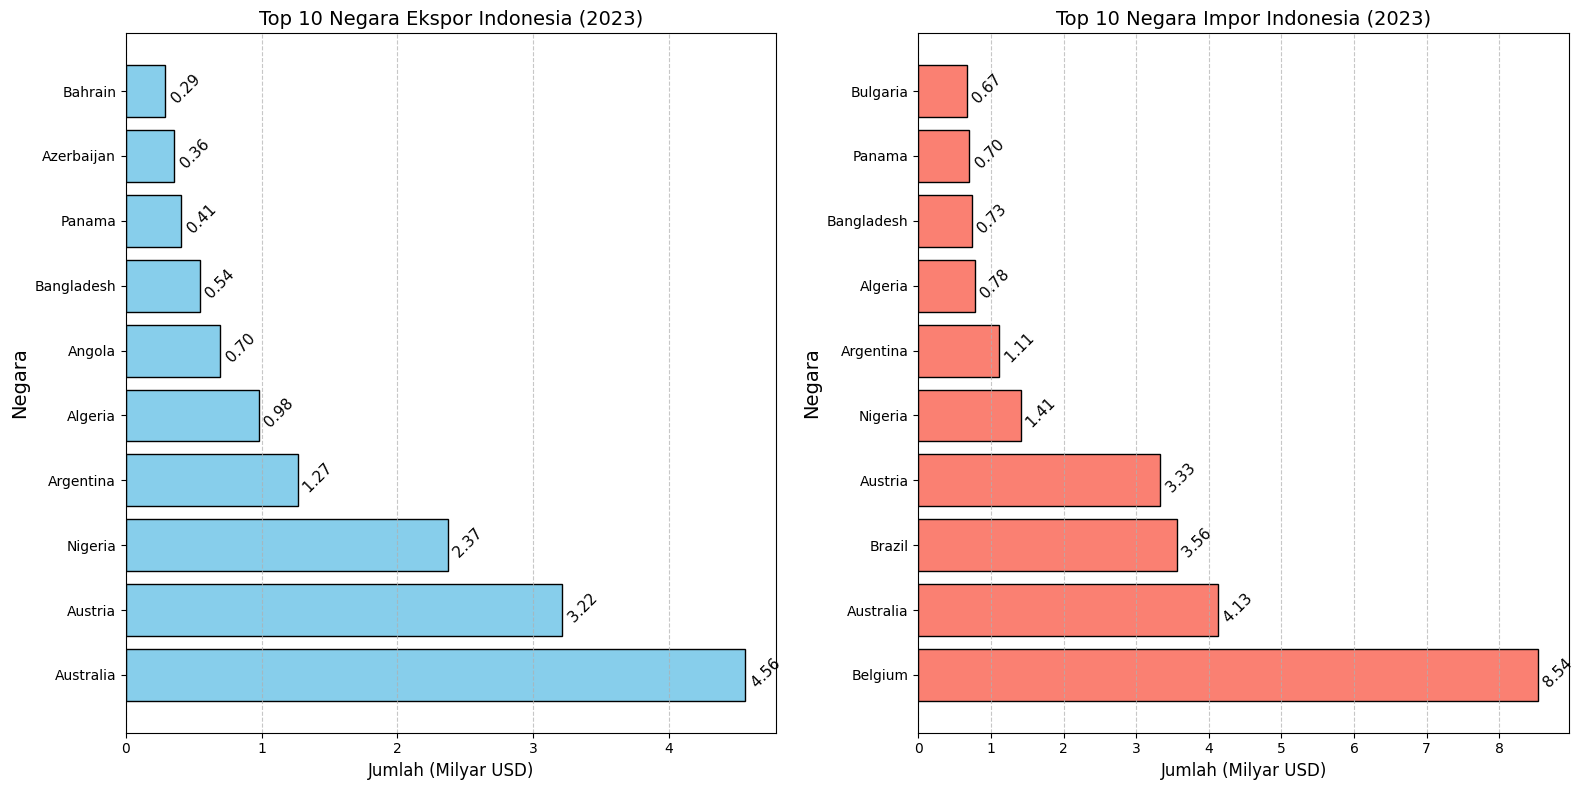

In [37]:
# convert to mil
no2_df_ekspor_vis = no2_df_ekspor.copy()
no2_df_impor_vis = no2_df_impor.copy()

no2_df_ekspor_vis['Jumlah'] = no2_df_ekspor_vis['Jumlah'] / 1e9
no2_df_impor_vis['Jumlah'] = no2_df_impor_vis['Jumlah'] / 1e9

plt.figure(figsize=(16, 8))

# t10 ekspor
plt.subplot(1, 2, 1)
plt.barh(no2_df_ekspor_vis['Negara'], no2_df_ekspor_vis['Jumlah'], color='skyblue', edgecolor='black')
plt.title('Top 10 Negara Ekspor Indonesia (2023)', fontsize=14)
plt.xlabel('Jumlah (Milyar USD)', fontsize=12)
plt.ylabel('Negara', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
for i, v in enumerate(no2_df_ekspor_vis['Jumlah']):
    plt.text(v, i, f" {v:.2f}", va='center', ha='left', rotation=45, fontsize=11)

# t10 impor
plt.subplot(1, 2, 2)
plt.barh(no2_df_impor_vis['Negara'], no2_df_impor_vis['Jumlah'], color='salmon', edgecolor='black')
plt.title('Top 10 Negara Impor Indonesia (2023)', fontsize=14)
plt.xlabel('Jumlah (Milyar USD)', fontsize=12)
plt.ylabel('Negara', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
for i, v in enumerate(no2_df_impor_vis['Jumlah']):
    plt.text(v, i, f" {v:.2f}", va='center', ha='left', rotation=45, fontsize=11)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [38]:
#5 Grafik  tren  nilai  ekspor,  impor,  neraca  perdagangan,  volume  perdagangan  (pilih: berdasarkan negara atau berdasarkan produk (kode hs/label)

no5_trend_df = final_df.groupby(['Tahun', 'Indikator']).agg({'Jumlah': 'sum'}).reset_index()

no5_trend_pivot = no5_trend_df.pivot(index='Tahun', columns='Indikator', values='Jumlah').reset_index()

# get neraca & volume
no5_trend_pivot['Neraca'] = no5_trend_pivot['Ekspor'] - no5_trend_pivot['Impor']
no5_trend_pivot['Volume'] = no5_trend_pivot['Ekspor'] + no5_trend_pivot['Impor']


In [39]:
no5_trend_pivot

Indikator,Tahun,Ekspor,Impor,Neraca,Volume
0,2003,9.073101e+07,8.992527e+07,805737.0,1.806563e+08
1,2004,2.881418e+08,7.062367e+08,-418094936.0,9.943785e+08
2,2005,3.389396e+08,7.988338e+08,-459894204.0,1.137773e+09
3,2006,5.266414e+08,9.633541e+08,-436712709.0,1.489995e+09
4,2007,6.174775e+08,1.169206e+09,-551728469.0,1.786683e+09
5,2008,7.714539e+08,1.387212e+09,-615757855.0,2.158666e+09
6,2009,5.888769e+08,1.126891e+09,-538014410.0,1.715768e+09
7,2010,7.922166e+08,1.347418e+09,-555201547.0,2.139635e+09
8,2011,1.021809e+09,1.653549e+09,-631740953.0,2.675358e+09
9,2012,1.033139e+09,1.574406e+09,-541266217.0,2.607545e+09


In [40]:
no5_trend_pivot[['Ekspor', 'Impor', 'Neraca', 'Volume']] /= 1e9
no5_trend_pivot

Indikator,Tahun,Ekspor,Impor,Neraca,Volume
0,2003,0.090731,0.089925,0.000806,0.180656
1,2004,0.288142,0.706237,-0.418095,0.994379
2,2005,0.338940,0.798834,-0.459894,1.137773
3,2006,0.526641,0.963354,-0.436713,1.489995
4,2007,0.617478,1.169206,-0.551728,1.786683
5,2008,0.771454,1.387212,-0.615758,2.158666
6,2009,0.588877,1.126891,-0.538014,1.715768
7,2010,0.792217,1.347418,-0.555202,2.139635
8,2011,1.021809,1.653549,-0.631741,2.675358
9,2012,1.033139,1.574406,-0.541266,2.607545


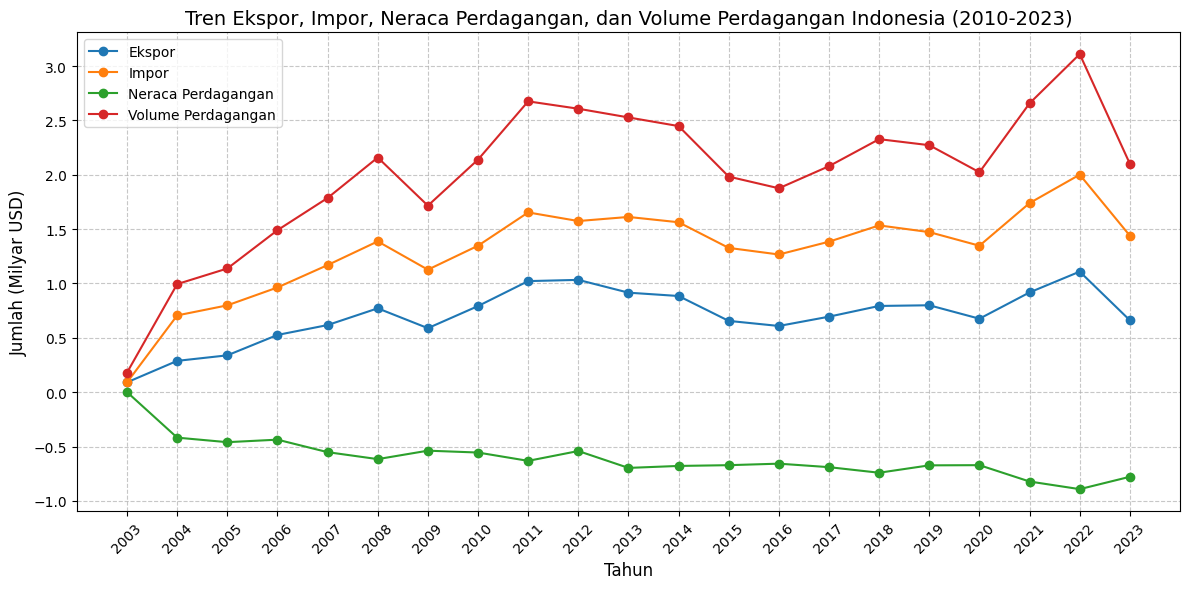

In [41]:
plt.figure(figsize=(12, 6))

plt.plot(no5_trend_pivot['Tahun'], no5_trend_pivot['Ekspor'], label='Ekspor', marker='o')
plt.plot(no5_trend_pivot['Tahun'], no5_trend_pivot['Impor'], label='Impor', marker='o')
plt.plot(no5_trend_pivot['Tahun'], no5_trend_pivot['Neraca'], label='Neraca Perdagangan', marker='o')
plt.plot(no5_trend_pivot['Tahun'], no5_trend_pivot['Volume'], label='Volume Perdagangan', marker='o')

plt.title('Tren Ekspor, Impor, Neraca Perdagangan, dan Volume Perdagangan Indonesia (2010-2023)', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Jumlah (Milyar USD)', fontsize=12)
plt.xticks(no5_trend_pivot['Tahun'], rotation=45)
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

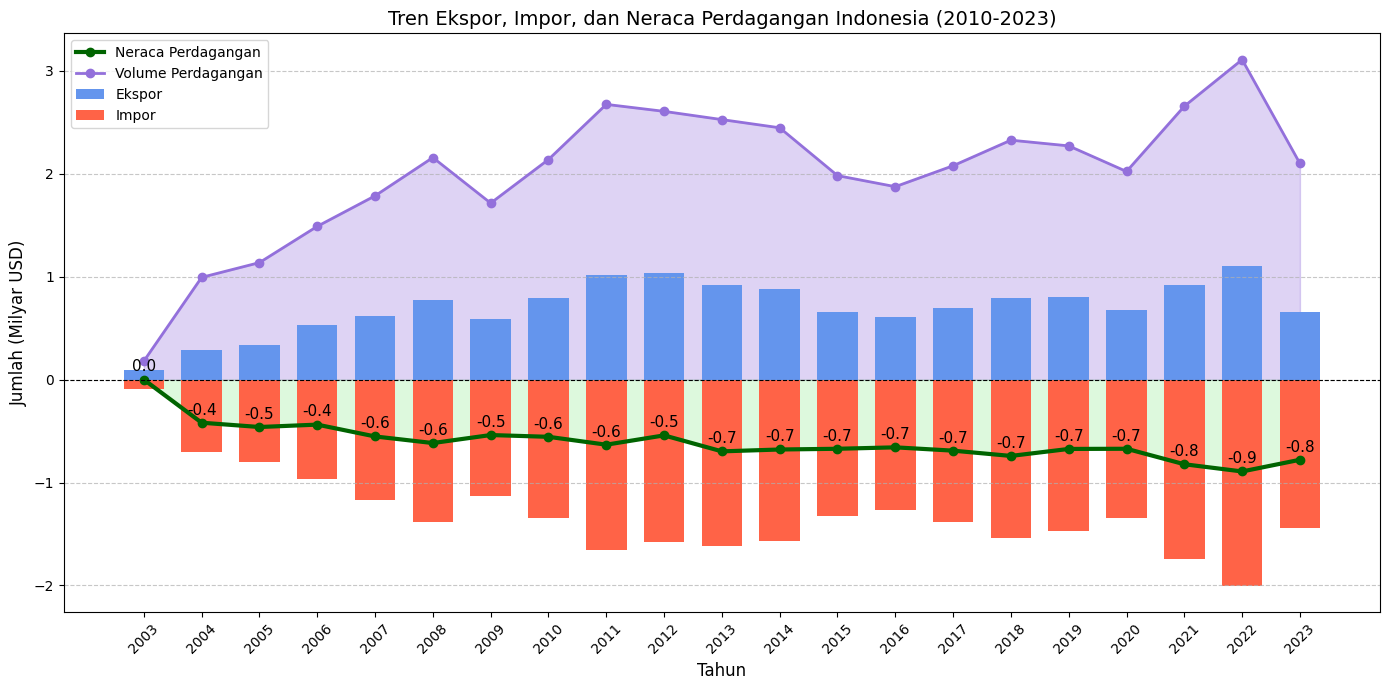

In [88]:
plt.figure(figsize=(14, 7))
plt.fill_between(no5_trend_pivot['Tahun'], no5_trend_pivot['Volume'], color='mediumpurple', alpha=0.3)
plt.fill_between(no5_trend_pivot['Tahun'], no5_trend_pivot['Neraca'], color='lightgreen', alpha=0.3)
plt.bar(no5_trend_pivot['Tahun'], no5_trend_pivot['Ekspor'], width=0.7, label='Ekspor', color='cornflowerblue')
plt.bar(no5_trend_pivot['Tahun'], -no5_trend_pivot['Impor'], width=0.7, label='Impor', color='tomato')
plt.plot(no5_trend_pivot['Tahun'], no5_trend_pivot['Neraca'], label='Neraca Perdagangan', color='darkgreen', marker='o', linewidth=3)
plt.plot(no5_trend_pivot['Tahun'], no5_trend_pivot['Volume'], label='Volume Perdagangan', color='mediumpurple', marker='o', linewidth=2)


for x, y in zip(no5_trend_pivot['Tahun'], no5_trend_pivot['Neraca']):
    plt.text(x, y + 0.05, f"{y:.1f}", ha='center', va='bottom', fontsize=11, color='black')

plt.axhline(0, color='black', linewidth=0.8, linestyle='--')

plt.title('Tren Ekspor, Impor, dan Neraca Perdagangan Indonesia (2010-2023)', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Jumlah (Milyar USD)', fontsize=12)
plt.legend()
plt.xticks(no5_trend_pivot['Tahun'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# NO2 Analisis ML

In [43]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

In [44]:
country_df = final_df.groupby(['Negara','Indikator'])['Jumlah'].sum().unstack(fill_value=0).reset_index()
# country_df['Neraca'] = country_df['Ekspor'] - country_df['Impor']

country_df

Indikator,Negara,Ekspor,Impor
0,Afghanistan,1.233346e+07,1.006155e+08
1,Albania,3.831525e+07,9.648595e+07
2,Algeria,9.786343e+08,7.772864e+08
3,American Samoa,1.896470e+05,8.608590e+05
4,Andorra,2.550839e+06,3.035542e+07
5,Angola,6.960580e+08,2.889229e+08
6,Anguilla,2.512280e+05,0.000000e+00
7,Antigua and Barbuda,8.495230e+05,8.365829e+06
8,Argentina,1.265923e+09,1.113565e+09
9,Armenia,3.413423e+07,7.612333e+07


In [45]:
feature = country_df[['Ekspor', 'Impor']]
Scaler = StandardScaler()
feature_scaled = Scaler.fit_transform(feature)

kmeans = KMeans(n_clusters=3, random_state=42)
country_df['Cluster'] = kmeans.fit_predict(feature_scaled)

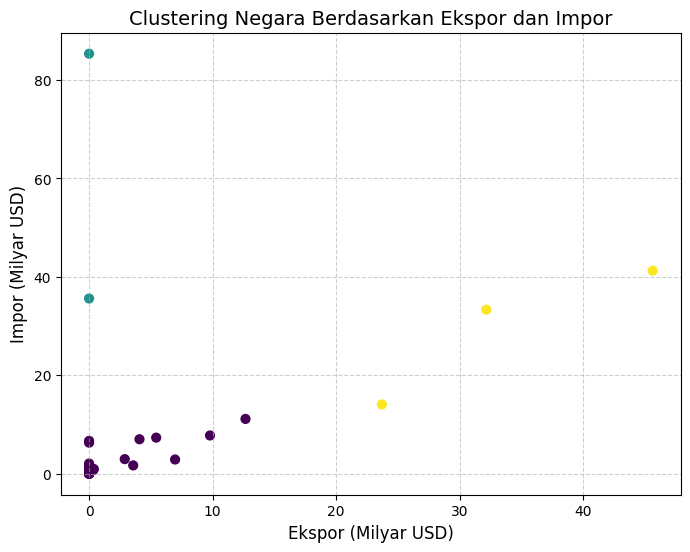

In [46]:
plt.figure(figsize=(8, 6))
plt.scatter(country_df['Ekspor']/1e8, country_df['Impor']/1e8, c=country_df['Cluster'], cmap='viridis', marker='o', s=40)
plt.title('Clustering Negara Berdasarkan Ekspor dan Impor', fontsize=14)
plt.xlabel('Ekspor (Milyar USD)', fontsize=12)
plt.ylabel('Impor (Milyar USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [47]:
country_df

Indikator,Negara,Ekspor,Impor,Cluster
0,Afghanistan,1.233346e+07,1.006155e+08,0
1,Albania,3.831525e+07,9.648595e+07,0
2,Algeria,9.786343e+08,7.772864e+08,0
3,American Samoa,1.896470e+05,8.608590e+05,0
4,Andorra,2.550839e+06,3.035542e+07,0
5,Angola,6.960580e+08,2.889229e+08,0
6,Anguilla,2.512280e+05,0.000000e+00,0
7,Antigua and Barbuda,8.495230e+05,8.365829e+06,0
8,Argentina,1.265923e+09,1.113565e+09,0
9,Armenia,3.413423e+07,7.612333e+07,0


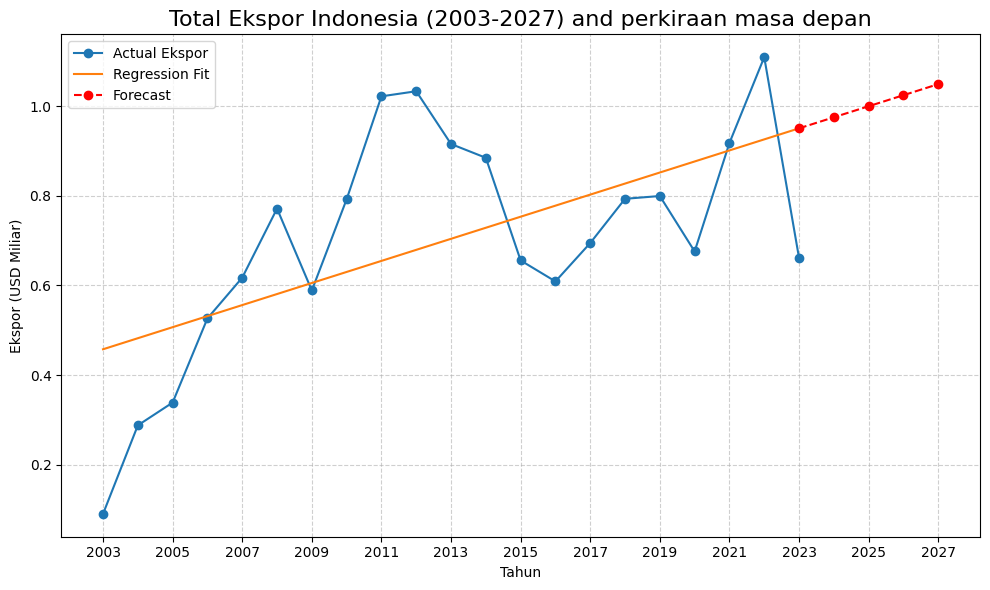

In [48]:
trend_df = final_df.groupby(['Tahun','Indikator'])['Jumlah'].sum().unstack().reset_index()


X = trend_df['Tahun']
Y = trend_df['Ekspor']

reg = LinearRegression()
reg.fit(X.values.reshape(-1, 1), Y)

trend_df['Pred_Ekspor'] = reg.predict(X.values.reshape(-1, 1))
future_years = pd.DataFrame({'Tahun': np.arange(2023, 2028)})
future_preds = reg.predict(future_years['Tahun'].values.reshape(-1, 1))

plt.figure(figsize=(10,6))
plt.plot(trend_df['Tahun'], trend_df['Ekspor']/1e9, label='Actual Ekspor', marker='o')
plt.plot(trend_df['Tahun'], trend_df['Pred_Ekspor']/1e9, label='Regression Fit')
plt.plot(future_years['Tahun'], future_preds/1e9, label='Forecast', color='red', linestyle='--', marker='o')

plt.title("Total Ekspor Indonesia (2003-2027) and perkiraan masa depan", fontsize=16)
plt.xlabel("Tahun")
plt.ylabel("Ekspor (USD Miliar)")
plt.legend()
plt.grid(linestyle='--', alpha=0.6)
plt.xticks(np.arange(2003, 2028, 2))
plt.tight_layout()
plt.show()

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
RF_trend_df = final_df.groupby(['Tahun','Indikator'])['Jumlah'].sum().unstack().reset_index()
RF_trend_df['Ekspor_lag1'] = RF_trend_df['Ekspor'].shift(1)
RF_trend_df = RF_trend_df.dropna().reset_index(drop=True)

In [51]:
RF_X = RF_trend_df[['Tahun','Ekspor_lag1']]
RF_y = RF_trend_df['Ekspor']

RF_train_spl = RF_trend_df['Tahun'] <= 2015
X_train, Y_train = RF_X[RF_train_spl], RF_y[RF_train_spl]
X_test, Y_test = RF_X[~RF_train_spl], RF_y[~RF_train_spl]

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, Y_train)

Y_pred = rf.predict(X_test)

In [52]:
print("Random Forest with Lag Features")
print("R² Score:", r2_score(Y_test, Y_pred))
print("RMSE:", mean_squared_error(Y_test, Y_pred))

Random Forest with Lag Features
R² Score: -0.06101716878096819
RMSE: 2.5089054976209644e+16


In [53]:
RF_trend_df['Pred_Ekspor'] = rf.predict(RF_X)

In [54]:
predicted_yrs = []
last_year = RF_trend_df.iloc[-1]['Tahun']
last_lag1 = RF_trend_df.iloc[-1]['Ekspor']

for year in range(int(last_year) + 1, 2028):
    X_future = pd.DataFrame([[year, last_lag1]], columns=RF_X.columns)
    pred = rf.predict(X_future)[0]
    predicted_yrs.append((year, pred))
    
    last_lag1 = pred

future_df = pd.DataFrame(predicted_yrs, columns=['Tahun', 'Pred_Ekspor'])

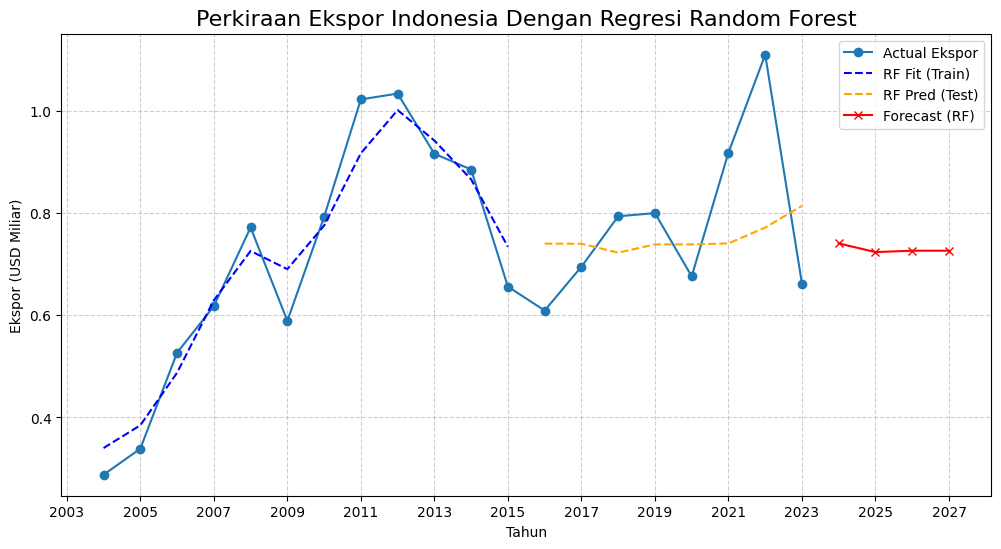

In [55]:
plt.figure(figsize=(12,6))

# Actual
plt.plot(RF_trend_df['Tahun'], RF_trend_df['Ekspor']/1e9, label="Actual Ekspor", marker='o')
plt.plot(RF_trend_df[RF_train_spl]['Tahun'], RF_trend_df[RF_train_spl]['Pred_Ekspor']/1e9, label="RF Fit (Train)", linestyle='--', color='blue')
plt.plot(RF_trend_df[~RF_train_spl]['Tahun'], RF_trend_df[~RF_train_spl]['Pred_Ekspor']/1e9, label="RF Pred (Test)", linestyle='--', color='orange')
plt.plot(future_df['Tahun'], future_df['Pred_Ekspor']/1e9, 'rx-', label="Forecast (RF)")

plt.title("Perkiraan Ekspor Indonesia Dengan Regresi Random Forest", fontsize=16)
plt.xlabel("Tahun")
plt.ylabel("Ekspor (USD Miliar)")
plt.legend()
plt.grid(linestyle='--', alpha=0.6)
plt.xticks(np.arange(2003, 2028, 2))
plt.show()